In [ ]:
import requests
import json
from pprint import pprint
import pandas as pd


In [ ]:
import json
from pprint import pprint
import pandas as pd

import sklearn
import statsmodels as sm

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import missingno

In [ ]:
# essa linha importa os recursos
import json, requests

# essa linha pega os recursos do link e atribui a variavel

# requisicao1 = requests.get("http://3.145.163.55:5000/dados/1/3/2020/2020")
# requisicao2 = requests.get("http://3.145.163.55:5000/dados/3/6/2020/2020")
# requisicao3 = requests.get("http://3.145.163.55:5000/dados/6/9/2020/2020")

requisicao = requests.get("http://3.145.163.55:5000/dados/1/2/2020/2020")


# realiza a conversão do response para um formato acessível ao python
data = (requisicao.json())
data

In [ ]:
## Quebrando o json em 2 dataframes (missing, original)
## Trabalhando com os valores de missing

miss = data['missing']
orig = data['original']
print (miss)

{"columns":["time","temp"],"index":[17520,17521,17522,17523,17524,17525,17526,17527,17528,17529,17530,17531,17532,17533,17534,17535,17536,17537,17538,17539,17540,17541,17542,17543,17544,17545,17546,17547,17548,17549,17550,17551,17552,17553,17554,17555,17556,17557,17558,17559,17560,17561,17562,17563,17564,17565,17566,17567,17568,17569,17570,17571,17572,17573,17574,17575,17576,17577,17578,17579,17580,17581,17582,17583,17584,17585,17586,17587,17588,17589,17590,17591,17592,17593,17594,17595,17596,17597,17598,17599,17600,17601,17602,17603,17604,17605,17606,17607,17608,17609,17610,17611,17612,17613,17614,17615,17616,17617,17618,17619,17620,17621,17622,17623,17624,17625,17626,17627,17628,17629,17630,17631,17632,17633,17634,17635,17636,17637,17638,17639,17640,17641,17642,17643,17644,17645,17646,17647,17648,17649,17650,17651,17652,17653,17654,17655,17656,17657,17658,17659,17660,17661,17662,17663,17664,17665,17666,17667,17668,17669,17670,17671,17672,17673,17674,17675,17676,17677,17678,17679,1768

In [ ]:
df_miss=json.loads(miss)
df_orig=json.loads(orig)

In [ ]:
### Dados miss

teste_miss = df_miss  # varival teste rescebe o data frame df
display(teste_miss) # Exibe o Dataframe já quebrado

In [ ]:
### Dados orig

teste_orig = df_orig  # varival teste rescebe o data frame df
display(teste_orig) # Exibe o Dataframe já quebrado

In [ ]:
#///////////////////////////  ### Separação dos dados #/////////////////////////// 

In [ ]:
### Dados miss

id_miss = teste_miss['index'] # cria o array id com os dados de index
cl_miss = teste_miss['columns'] #cria o array cl com os dados de columns
dt_miss = teste_miss['data']  #cria o array de dt com os dados de data

In [ ]:
### Dados orig

id_orig = teste_orig['index'] # cria o array id com os dados de index
cl_orig = teste_orig['columns'] #cria o array cl com os dados de columns
dt_orig = teste_orig['data']  #cria o array de dt com os dados de data

In [ ]:
#///////////////////////////  ### Conversao dos dados #/////////////////////////// 

In [ ]:
# Convertendo os arrays em colunas

df_dt_miss = pd.DataFrame(dt_miss)
df_dt_orig = pd.DataFrame(dt_orig)

In [ ]:
#///////////////////////////  ### Renomeando as Colunas('0','1'//'time','temp') #/////////////////////////// 

In [ ]:
### Renomear Colunas Dataset

df_dt_miss.columns = ['time', 'temp']  #Renomeia as Colunas do DataSet
df_dt_orig.columns = ['time', 'temp']  #Renomeia as Colunas do DataSet

In [ ]:
### criar um arquivo csv de saída como submit.csv
df_dt_orig.to_csv('orig_submission_final.csv', index=False)
print('submission_final.csv foi salvo!')

#submit_final.csv foi salvo!

In [ ]:
#///////////////////////////  ### Iniciando o Tratamento dos Dados(missing data) #/////////////////////////// 

In [ ]:
import numpy as np

In [ ]:
### Dados miss

print('Media:', np.mean(df_dt_miss))
print('Desvio Padrao:', np.std(df_dt_miss))
print('Coeficiente variacao:', np.std(df_dt_miss)/np.mean(df_dt_miss))

In [ ]:
### Dados orig

print('Media:', np.mean(df_dt_orig))
print('Desvio Padrao:', np.std(df_dt_orig))
print('Coeficiente variacao:', np.std(df_dt_orig)/np.mean(df_dt_orig))

In [ ]:
#///////////////////////////  ### Identificando Dados Faltantes | Tecnica I (fillna) #/////////////////////////// 

In [ ]:
### Dados miss
# Identificando Dados Faltantes

df_dt_miss = pd.DataFrame(dt_miss)#conversao em colunas
df_dt_miss.columns = ['time', 'temp']  #Renomeia as Colunas do DataSet
display(df_dt_miss)#Exibe o dataframe

In [ ]:
### Dados orig
# Identificando Dados Faltantes

df_dt_orig = pd.DataFrame(dt_orig)#conversao em colunas
df_dt_orig.columns = ['time', 'temp']  #Renomeia as Colunas do DataSet
display(df_dt_orig)#Exibe o dataframe

In [ ]:
### Dados miss
## Tecnica de fillna | Substitui os dados faltantes por um valor especifico

df_dt_miss_tec1 = pd.DataFrame(df_dt_miss) #df_tec1 recebe o dataframe df_dt
df_dt_miss_tec1['temp'].fillna(8.3, inplace=True) # troquei os valores faltantes por 8.3
df_dt_miss_tec1['temp'].astype(np.int64) # converte os valores de float para int

In [ ]:
### Dados orig
## Tecnica de fillna | Substitui os dados faltantes por um valor especifico

df_dt_orig_tec1 = pd.DataFrame(df_dt_orig) #df_tec1 recebe o dataframe df_dt
df_dt_orig_tec1['temp'].fillna(8.3, inplace=True) # troquei os valores faltantes por 8.3
df_dt_orig_tec1['temp'].astype(np.int64) # converte os valores de float para int

In [ ]:
#///////////////////////////  ### Protar o Grafico #/////////////////////////// 

In [ ]:
##  Reseta os valores de df_dt

df_dt_miss = pd.DataFrame(dt_miss)#conversao em colunas
df_dt_miss.columns = ['time', 'temp']  #Renomeia as Colunas do DataSet
display(df_dt_orig)#Exibe o dataframe

In [ ]:
### Dados miss
# Exibe um grafico de barras com os dados time e temp

#missingno.bar(df_dt_miss) # Antes de tratar
missingno.bar(df_dt_miss_tec1) # Depois de tratar

In [ ]:
### Dados orig
# Exibe um grafico de barras com os dados time e temp

missingno.bar(df_dt_orig) # Antes de tratar
#missingno.bar(df_dt_orig_tec1) # Depois de tratar

In [ ]:
####  Manipulando dados ausentes com imputação univariada usando pandas

In [ ]:
import matplotlib.pyplot as plt

TypeError: ignored

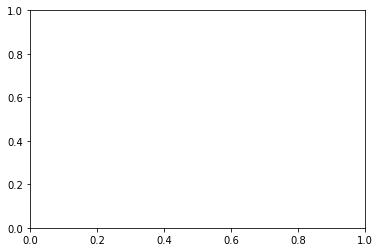

In [ ]:
#(df_dt_miss) # Antes de tratar
#(df_dt_miss_tec1) # Depois de tratar

plt.plot(df_dt_miss, df_dt_miss_tec1 )
plt.show()

In [ ]:
# dt_miss = teste_miss['data']  #cria o array de dt com os dados de data
# dt_orig = teste_orig['data']  #cria o array de dt com os dados de data
# df_dt_miss.columns = ['time', 'temp']  #Renomeia as Colunas do DataSet

